In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.combine import SMOTETomek
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [7]:
data= load_breast_cancer()
df= pd.DataFrame(data.data, columns= data.feature_names)
df['target']= data.target

In [8]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [9]:
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [10]:
df['target']= df['target'].map({0:'M', 1:'B'})

In [11]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [12]:
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,B


In [14]:
df['target'].value_counts()

,count
target,
B,357
M,212


<ipython-input-17-a6dbdb95bbb7>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette=countplot_colors, ax= axes[1])


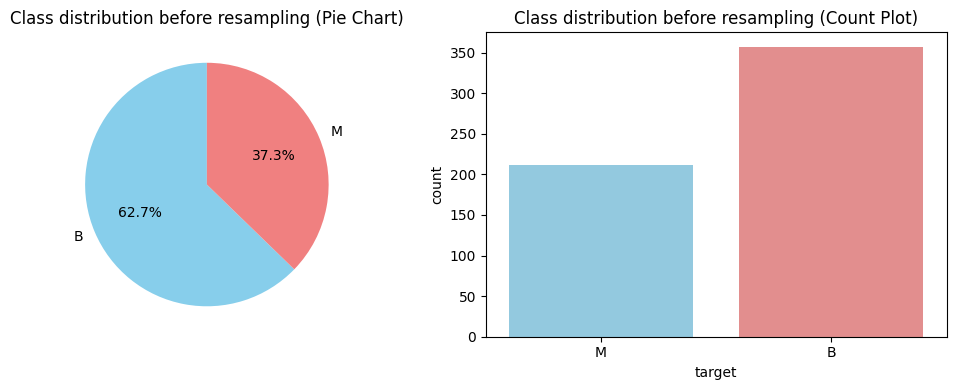

In [17]:
fig, axes= plt.subplots(nrows=1, ncols=2, figsize=(10,4))

pie_colors= ['skyblue','lightcoral']
axes[0].pie(df['target'].value_counts(),labels= df['target'].value_counts().index, autopct='%1.1f%%', startangle=90, colors= pie_colors)
axes[0].set_title('Class distribution before resampling (Pie Chart)')

countplot_colors= sns.color_palette(pie_colors)
sns.countplot(x='target', data=df, palette=countplot_colors, ax= axes[1])
axes[1].set_title('Class distribution before resampling (Count Plot)')

plt.tight_layout()
plt.show()

In [18]:
X= df.drop('target', axis=1)
y= df['target']

In [19]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2, random_state= 11)

In [22]:
def plot_resampling_results(y_resampled, title):
  plt.figure(figsize=(4,4))
  pd.Series(y_resampled).value_counts().plot.pie(autopct='%1.1f%%', startangle= 90, colors=['skyblue','lightcoral'])
  plt.title(title)
  plt.show()

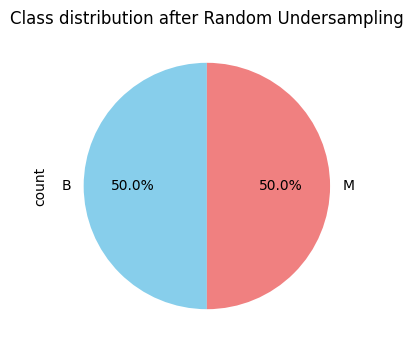

In [32]:
# Random Undersampling
rus= RandomUnderSampler(random_state= 101, sampling_strategy= 1) # sampling_strategy is how many minority instances must be there for 100 majority instances (default = 1)
X_rus, y_rus= rus.fit_resample(X_train,y_train)
plot_resampling_results(y_rus,'Class distribution after Random Undersampling')

In [33]:
y_train.value_counts()

,count
target,
B,281
M,174


In [34]:
y_rus.value_counts()

,count
target,
B,174
M,174


In [35]:
print('No. of records discarded:',y_train.shape[0]-y_rus.shape[0])

No. of records discarded: 107


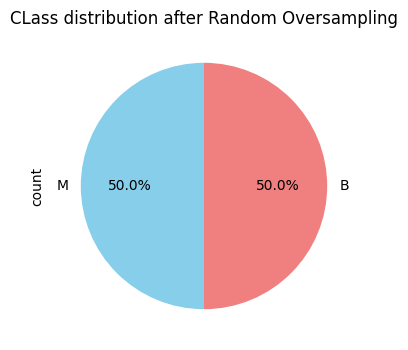

In [37]:
# Random Oversampler
ros= RandomOverSampler(random_state= 111)
X_ros, y_ros= ros.fit_resample(X_train,y_train)
plot_resampling_results(y_ros,'CLass distribution after Random Oversampling')

In [39]:
y_ros.value_counts()

,count
target,
M,281
B,281


In [40]:
print("No. of records added:",y_ros.shape[0]-y_train.shape[0])

No. of records added: 107


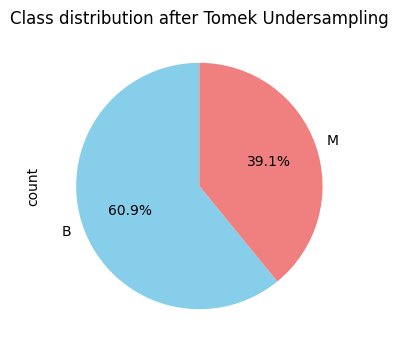

In [42]:
# Tomek Undersampling
tomek= TomekLinks()
X_tl, y_tl= tomek.fit_resample(X_train, y_train)
plot_resampling_results(y_tl,'Class distribution after Tomek Undersampling')

In [43]:
y_tl.value_counts()

,count
target,
B,271
M,174


In [44]:
print('No. of records discarded: ',y_train.shape[0]-y_tl.shape[0])

No. of records discarded:  10


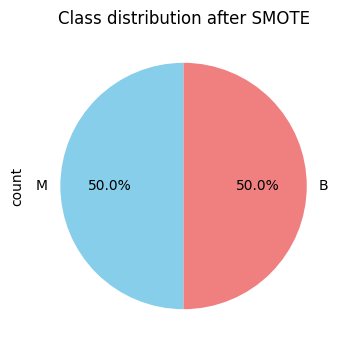

In [45]:
# SMOTE
smote= SMOTE(random_state= 123)
X_smote, y_smote= smote.fit_resample(X_train,y_train)
plot_resampling_results(y_smote, 'Class distribution after SMOTE')

In [49]:
y_smote.value_counts()

,count
target,
M,281
B,281


In [51]:
print('No. of records added: ',y_smote.shape[0]-y_train.shape[0])

No. of records added:  107


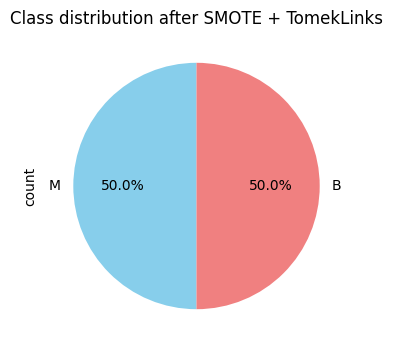

In [54]:
# SMOTE + TomekLinks
smote_tomek= SMOTETomek(random_state= 20)
X_st, y_st= smote_tomek.fit_resample(X_train,y_train)
plot_resampling_results(y_st, 'Class distribution after SMOTE + TomekLinks')

In [55]:
y_st.value_counts()

,count
target,
M,272
B,272


In [57]:
print('No. of records added : ',y_train.shape[0]-y_st.shape[0])

No. of records added :  -89


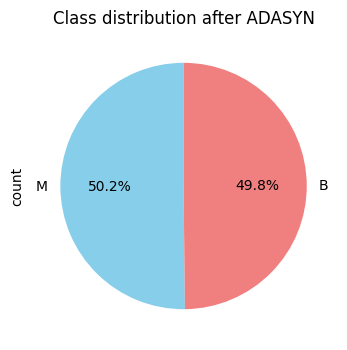

In [58]:
# ADASYN
adasyn= ADASYN(random_state= 211)
X_adasyn, y_adasyn= adasyn.fit_resample(X_train,y_train)
plot_resampling_results(y_adasyn, 'Class distribution after ADASYN')

In [59]:
y_adasyn.value_counts()

,count
target,
M,283
B,281


In [60]:
print("No. of records added: ",y_adasyn.shape[0]-y_train.shape[0])

No. of records added:  109
